In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [3]:
data = pd.read_csv('C://Users//paran//OneDrive//Desktop//Austic_spectrum_disorder//Autism_Data.csv')

In [4]:
data

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [5]:
data.shape

(704, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [7]:
data.isnull() #handling missing values ,null values

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
701,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
702,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

A1_score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

<Axes: >

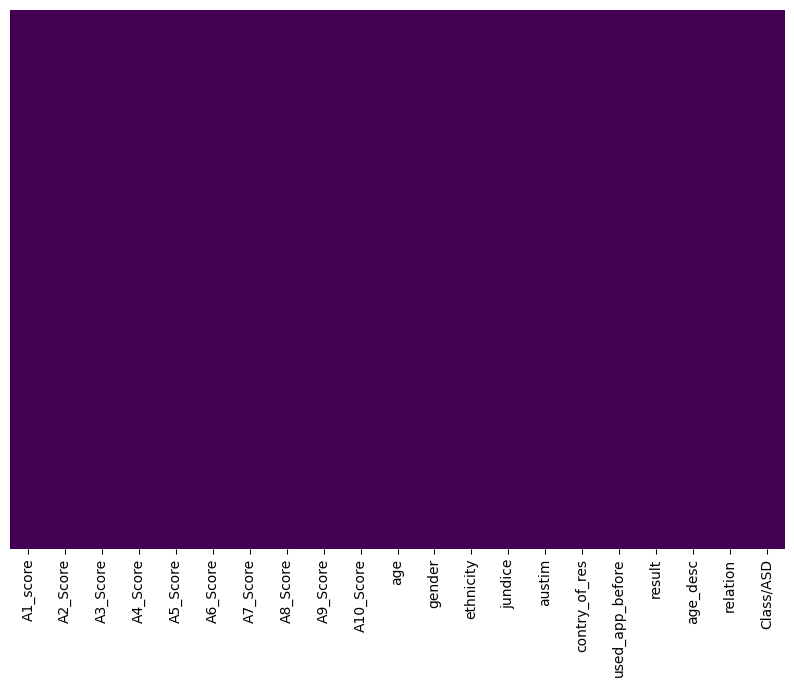

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)
# creating a heatmap using the seaborn library in Python

In [10]:
(data['age'].eq('?')).any()


True

In [11]:
(data['ethnicity'].eq('?')).any()


True

In [12]:
(data['relation'].eq('?')).any()


True

In [13]:
data.replace('?', np.NAN, inplace=True)


In [14]:
data.head()

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,18 and more,NaN,NO


In [15]:
data.isnull().sum()

A1_score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

<Axes: >

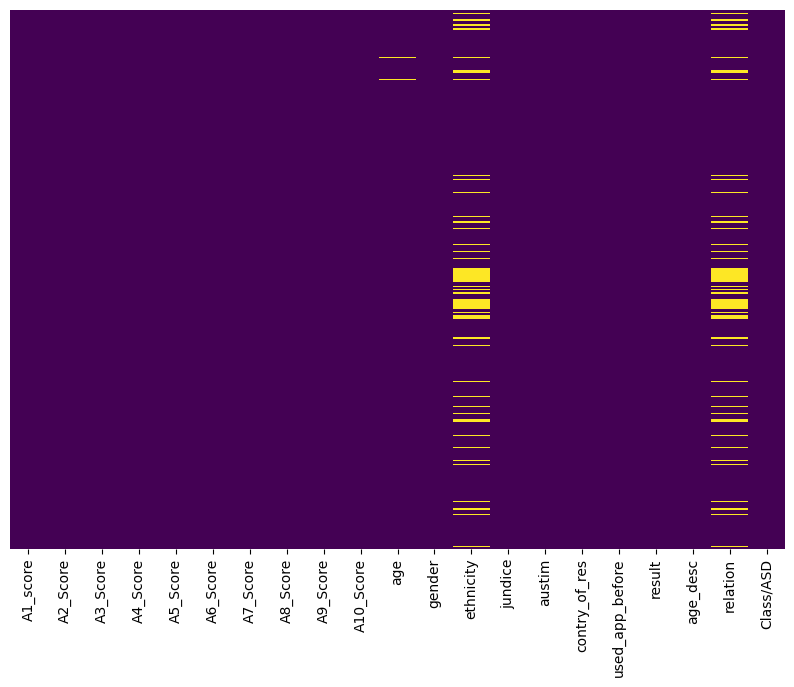

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)


In [17]:
data=data.drop('used_app_before',axis=1)


<Axes: >

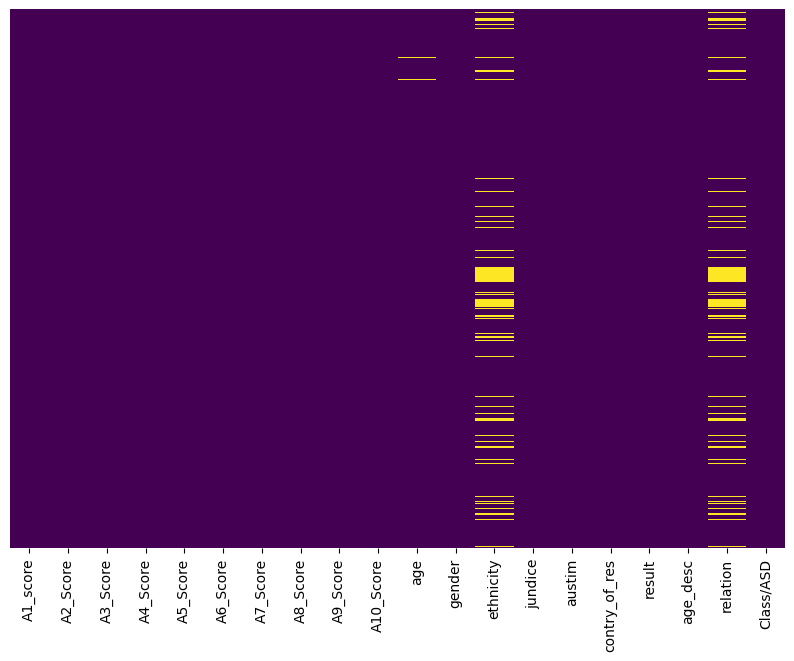

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [19]:
data['age']=data['age'].apply(lambda x:float(x))

In [20]:
data['age'].max()

383.0

In [21]:
data_p=data
data_p.dropna(inplace=True)

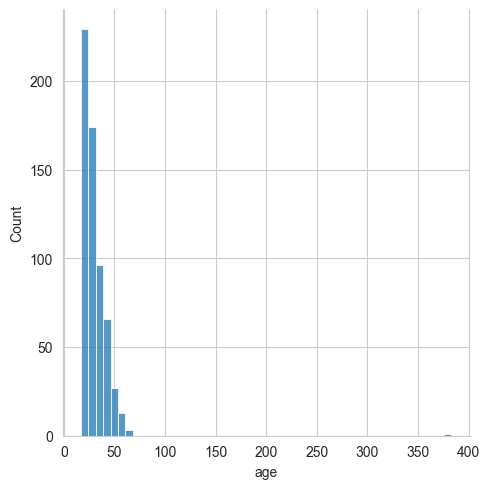

In [22]:
sns.set_style('whitegrid')
sns.displot(data_p['age'],bins=50,kde=False)

In [23]:
data_t=data_p[data_p['age']!=383]

In [24]:
data_t['age'].mean()

29.63486842105263

In [25]:
data.loc[data.age == 383, 'age'] = 30

<Axes: >

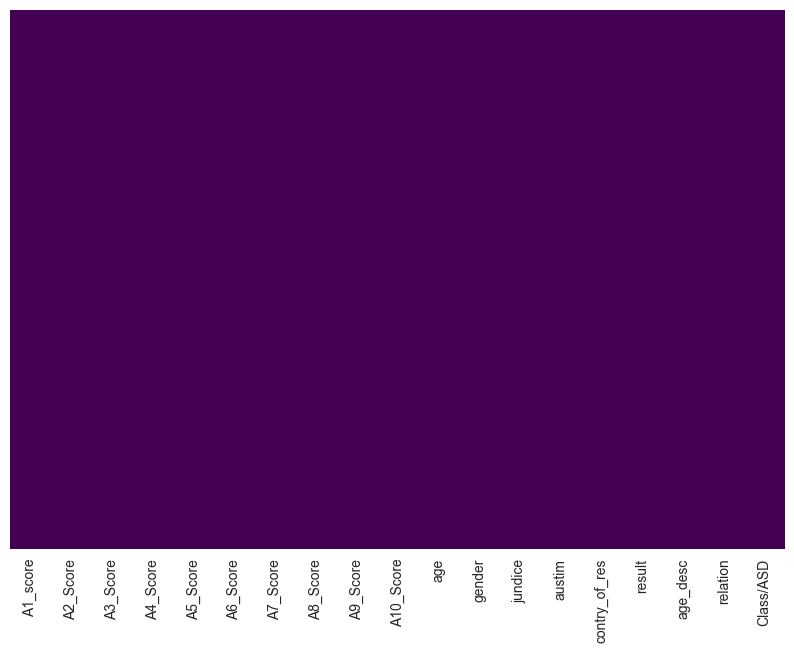

In [26]:
data['age']=data['age'].fillna(30)
data=data.drop('ethnicity',axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [27]:
data.drop(['contry_of_res','age_desc','relation'],axis=1,inplace=True)
data.head()

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,austim,result,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,no,no,6,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,no,yes,5,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,yes,yes,8,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,no,yes,6,NO
5,1,1,1,1,1,0,1,1,1,1,36.0,m,yes,no,9,YES


In [28]:
sex=pd.get_dummies(data['gender'],drop_first=True)
jaund=pd.get_dummies(data['jundice'],drop_first=True,prefix="Had_jaundice")
rel_autism=pd.get_dummies(data['austim'],drop_first=True,prefix="Rel_had")
detected=pd.get_dummies(data['Class/ASD'],drop_first=True,prefix="Detected")

In [29]:
data=data.drop(['gender','jundice','austim','Class/ASD'],axis=1)
data_featured=pd.concat([data,sex,jaund,rel_autism,detected],axis=1)
data_featured.head()

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes,Detected_YES
0,1,1,1,1,0,0,1,1,0,0,26.0,6,False,False,False,False
1,1,1,0,1,0,0,0,1,0,1,24.0,5,True,False,True,False
2,1,1,0,1,1,0,1,1,1,1,27.0,8,True,True,True,True
3,1,1,0,1,0,0,1,1,0,1,35.0,6,False,False,True,False
5,1,1,1,1,1,0,1,1,1,1,36.0,9,True,True,False,True


In [30]:
data.describe() #descriptive statistics

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,29.635468,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,9.686116,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,10.000000


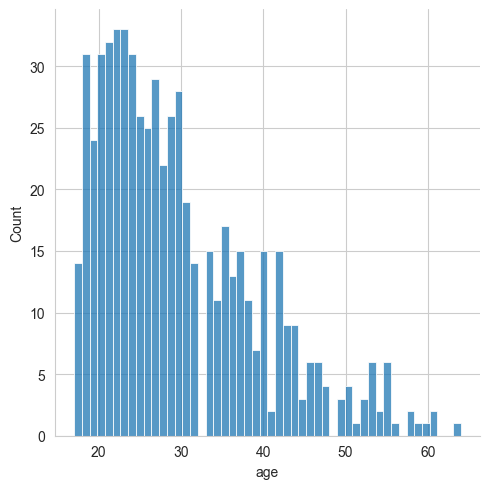

In [31]:
sns.displot(data_featured['age'],bins=50,kde=False)

<Axes: xlabel='Detected_YES', ylabel='count'>

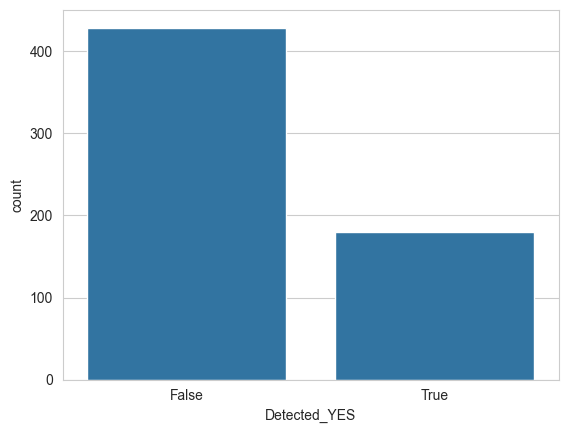

In [32]:
sns.countplot(x='Detected_YES',data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

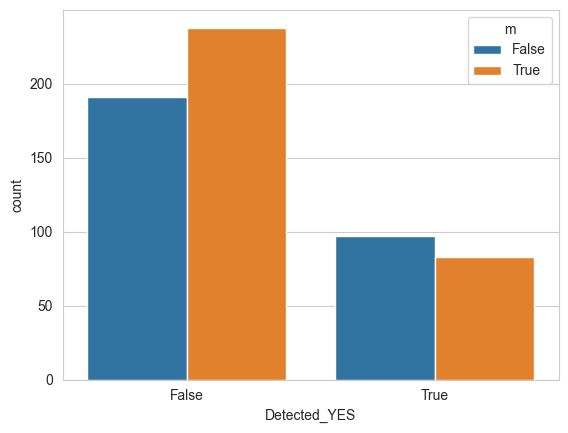

In [33]:
sns.countplot(x='Detected_YES',hue="m",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

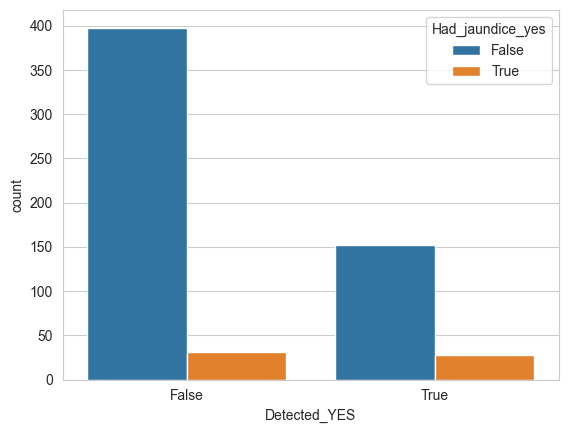

In [34]:
sns.countplot(x='Detected_YES',hue="Had_jaundice_yes",data=data_featured)

<Axes: xlabel='Detected_YES', ylabel='count'>

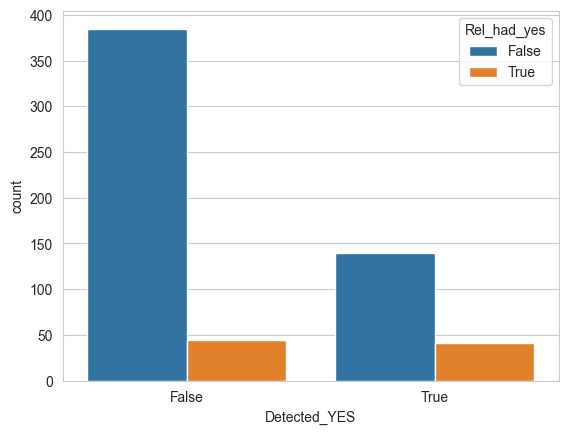

In [35]:
sns.countplot(x='Detected_YES',hue="Rel_had_yes",data=data_featured)

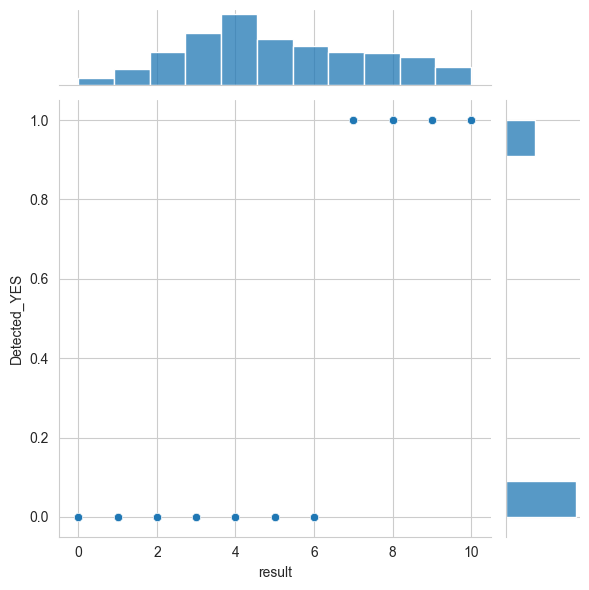

In [36]:
sns.jointplot(x="result",y="Detected_YES",data=data_featured)

In [37]:
# Assuming 'data_featured' is your DataFrame
print(data_featured.columns)


Index(['A1_score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'Had_jaundice_yes', 'Rel_had_yes', 'Detected_YES'],
      dtype='object')


<Axes: >

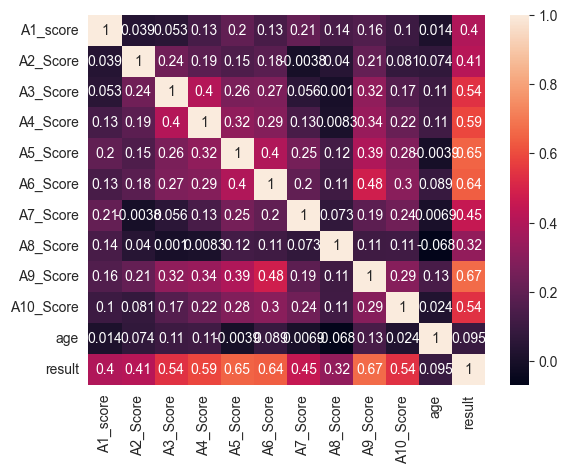

In [38]:
sns.heatmap(data.corr(),annot=True)

In [39]:
X=data_featured[['A1_score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'm',
       'Had_jaundice_yes', 'Rel_had_yes']]
y=data_featured['Detected_YES']

In [40]:
X

,A1_score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,m,Had_jaundice_yes,Rel_had_yes
0,1,1,1,1,0,0,1,1,0,0,26.0,6,False,False,False
1,1,1,0,1,0,0,0,1,0,1,24.0,5,True,False,True
2,1,1,0,1,1,0,1,1,1,1,27.0,8,True,True,True
3,1,1,0,1,0,0,1,1,0,1,35.0,6,False,False,True
5,1,1,1,1,1,0,1,1,1,1,36.0,9,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,1,1,1,1,1,1,1,1,1,1,27.0,10,False,False,False
699,0,1,0,1,1,0,1,1,1,1,25.0,7,False,False,False
700,1,0,0,0,0,0,0,1,0,1,34.0,3,True,False,False
702,1,0,0,1,1,0,1,0,1,1,35.0,6,True,False,False


In [41]:
y

0      False
1      False
2       True
3      False
5       True
       ...  
698     True
699     True
700    False
702    False
703     True
Name: Detected_YES, Length: 609, dtype: bool

In [42]:
X.result.describe()

count    609.000000
mean       5.077176
std        2.522717
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: result, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [45]:
print("Shape of X_train: ",X_train. shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X test: ",X_test.shape)
print("Shape of y test: ",y_test.shape)


Shape of X_train:  (426, 15)
Shape of y_train:  (426,)
Shape of X test:  (183, 15)
Shape of y test:  (183,)


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lgr=LogisticRegression()

In [48]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [49]:
pred=lgr.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_true=y_test,y_pred=pred))
accuracy_lr=lgr.score(X_test,y_test)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       132
        True       1.00      1.00      1.00        51

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



In [52]:
from sklearn.svm import SVC #svm classifier model
svm=SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)

SVC(random_state=0)

In [53]:
y_pred_svc=svm.predict(X_test)

In [54]:
print('Traning set:',svm.score(X_train,y_train))
print('Traning set:',svm.score(X_test,y_test))

Traning set: 0.9530516431924883
Traning set: 0.9453551912568307


In [55]:
accuracy_svc=svm.score(X_test,y_test)
print('Accuracy_SVM:',accuracy_svc*100)

Accuracy_SVM: 94.53551912568307


In [56]:
dt=DecisionTreeClassifier()  #decision tree


In [57]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [58]:
y_pred_dt=dt.predict(X_test)


In [59]:
print('Training Set: ',dt.score(X_train,y_train))
print('Test Set: ',dt.score(X_test,y_test))


Training Set:  1.0
Test Set:  1.0


In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt)*100)


Accuracy: 100.0


In [61]:
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy DT:',accuracy_dt*100)

Accuracy DT: 100.0


In [62]:
rand_forest = RandomForestClassifier(random_state=42) #random forest


In [63]:
# Fit the model to the data
rand_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [64]:
predictionRF= rand_forest.predict(X_test)
# check the accuracy on the training set 
print('Training set : ',rand_forest.score(X_train, y_train))
print('Testing set: ',rand_forest.score (X_test, y_test))


Training set :  1.0
Testing set:  1.0


In [65]:
accuracy_RF=rand_forest.score(X_test, y_test) 
print ("Accuracy_RF:",accuracy_RF*100)


Accuracy_RF: 100.0


In [66]:
from sklearn.neighbors import KNeighborsClassifier #KNN 
knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit (X_train, y_train)


KNeighborsClassifier()

In [67]:
#Predicting the test set result 
y_pred=knn.predict(X_test)


In [68]:
#Calculate accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_KNN = accuracy_score(y_test, y_pred)
print (f'Accuracy_KNN:{accuracy_KNN*100}')

Accuracy_KNN:96.17486338797814


In [69]:
import pickle

In [70]:
with open(r'model.pkl','wb') as file:
    pickle.dump(dt,file)

In [71]:
model=pickle.load(open('model.pkl', 'rb'))
print (model.predict([[1,1,1,1,0,0,1,1,0,0,26,6,0,0,0]]))

[False]


c:\Users\paran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:
# Create a table to compare the accuracies of each model
accuracy_df = pd.DataFrame({
'Model': ['Logistic Regression', 'SVM', 'DecisionTree', 'Randomforest', 'KNN'], 
'Accuracy': [accuracy_lr*100, accuracy_svc*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100]
})
print(accuracy_df)

                 Model    Accuracy
0  Logistic Regression  100.000000
1                  SVM   94.535519
2         DecisionTree  100.000000
3         Randomforest  100.000000
4                  KNN   96.174863


Text(0, 0.5, 'Accuracy')

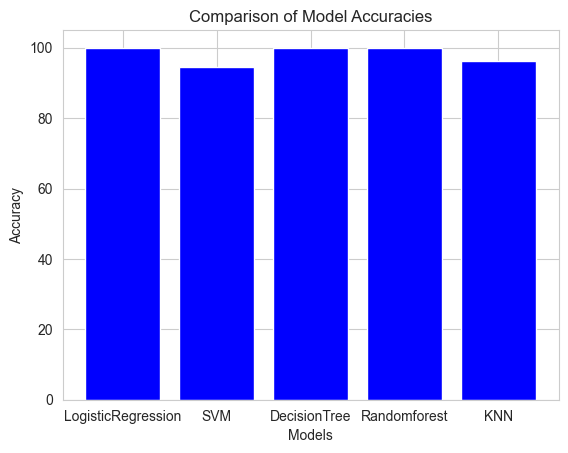

In [73]:
models = ['LogisticRegression', 'SVM', 'DecisionTree', 'Randomforest', 'KNN']
accuracies = [accuracy_lr*100, accuracy_svc*100, accuracy_dt*100, accuracy_RF*100, accuracy_KNN*100] 
plt.bar(models, accuracies, color='blue')

#Add title and axis Labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

In [74]:
import joblib
classifier=joblib.dump(rand_forest,'rand_forest.pkl')